#  Paper Information

- __Paper title__: Unified Pre-training with Pseudo Texts for Text-To-Image
Person Re-identification
- __Date Published__: 4/9/2023
- __Conference__: ICCV 2023 (rank A)
- __Link github__: https://github.com/ZhiyinShao-H/UniPT
- __Link paper__: https://arxiv.org/abs/2309.01420

# Overview/Main contribution

- Construct a new dataset for general pretraining, called LUPerson-T
- Two pretext tasks for pretraining:
    - Constrastive Learning (CL): similar to CLIP
    - Masked Language Modeling: 
        - Behave like original BERT
            - Just use self-attention mechanism with query, key, value from text representation
        - Just for avoiding overfitting caused by contrastive learning
            - Not for learning relation between text and image like paper APTM, IRRA, ...
            - APTM, IRRA use cross-attention mechanism with query  as text representation, key & value from visual representation 

- Objectives use for finetunning TBPR:
    - ID loss
    - Ranking loss 
        - Just extension of triplet loss for text/image
    - PGU loss (from paper LGUR, AMM MM 2022)

# LUPerson-T Dataset

## Overview dataset

- Large-scale dataset: 1.3M pairs of image - text caption

- Based on LUPerson, a large-scale dataset for Person Re-Id:
    - Just attached the additional text caption for each image in original dataset
    - New dataset contains a ID label, and a text caption for each image

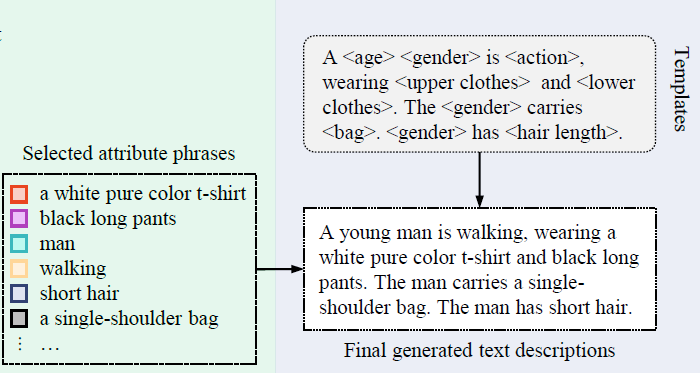

## How dataset was created?

Follow divide-conquer-combine strategy 

__Phase 1 (Divide): Create a set of Attribute Phrases__

- Examined most person images in the dataset and extract 14 kinds of attributes based on their frequency
of occurrence, then group these attributes
into two sets:
    - The __required set__ includes 6 categories of attributes that every person must possess all of these:
    ```text
        <age>, <gender>, <upper clothes>, <lower clothes>, <action>  <hair length>
    ``` 
    - The __optional set__ contains 8 categories of attributes that a person is likely to have: 
    ```text 
            <bag>, <glasses>, <smoke>, <hat>, <cellphone>, <umbrella>, <gloves>, <vehicle>
    ```
 
- These 14 categories of attributes cover
most basic aspects of pedestrian appearances and already
facilitate good pre-training.

- For each attribute category, there are some corresponed prompts that behave as classes in classfication problem.

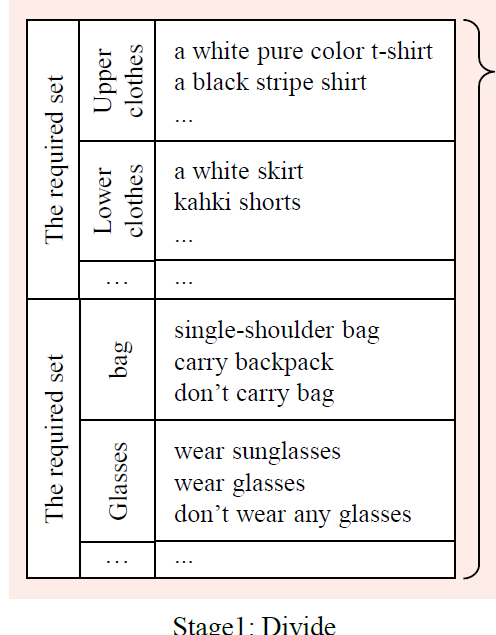

__Phase 2 (Conquer): Find the matched attibute phrases for each image__

- Convert attribute phrases into the standard prompt format: “A photo of a person <phrases>”
- Use CLIP to zero-shot classification for each attribute category
- For each person image feature, calculate cosine score between itself and all
prompt features. 
    - For each of the required attribute categories, choose the phrase with highest score 
    - For each of the optional attribute categories, choose the satisfied phrase with a softmax
probability larger than 0.9.

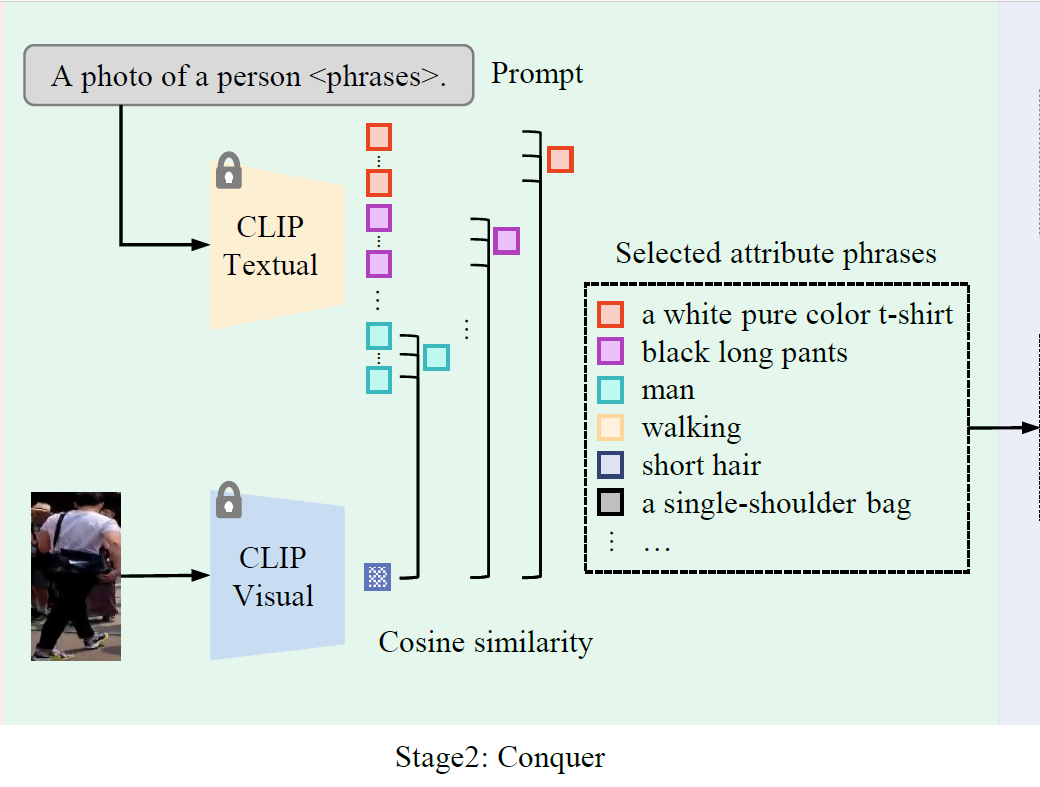

__Phase 3 (Combine): Fill the matched attribute phrase into blanks__

- For each person image and the matched attribute phrases get from phase 2:
    - Choose a random template from pre-defined 456 templates
    - Fill the attribute phares in correct positions

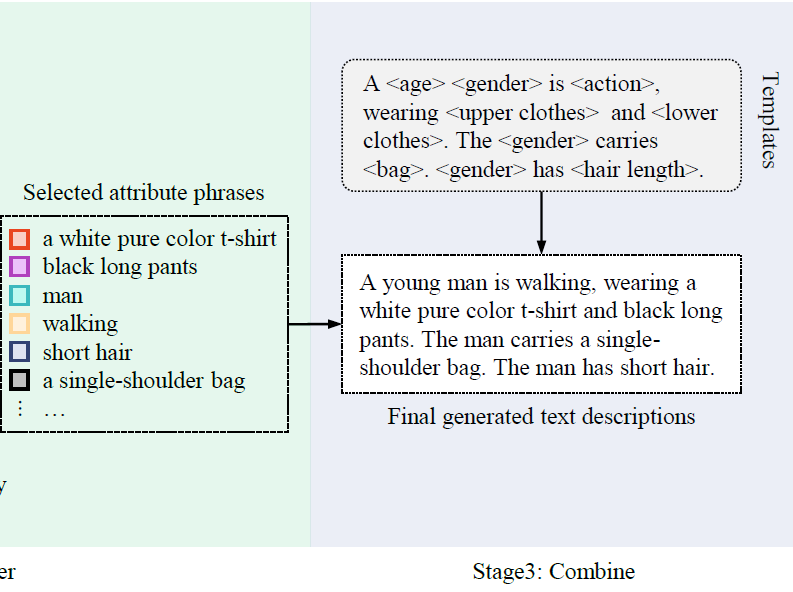

# Method for pretraining

## Model Architecture

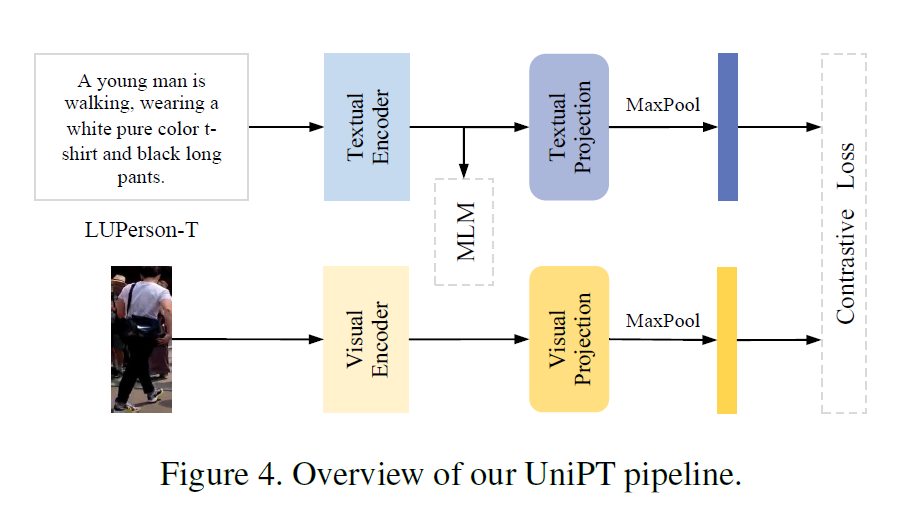

- Visual encoder: Vision Transformer (ViT-B16) or DeiT Transformer
    - Input is an image
    - Output is sequence of vector embedding
- Texual encoder: BERT
    - Input is a text
    - Output is sequence of vector embedding
- Visual/Texual Projections: 1x1 convolution with $D_{in}$ channel, $D_{out}$ kernels 
    - Consider each vector in the output sequence of encoder as a tensor (1x1x$D_{in}$)
    - Equivalient to a linear layer
- Max Pooling is used to get the global representation vector (not use the CLS token like APTM): L x D -> 1 x D

## Objective Functions

- Cosntrastive Loss: applied the CLIP 's formula for a minibatch of pairs (image-text) 
- MLM: applied the masked stratregy and the formula like original BERT

Final loss: $L = L_{CL} + L_{MLM}$

# Method for finetunning

## Objective Functions

__Ranking loss__

- Extension of triplet loss for mulitple modalities
- $\boldsymbol{v}, \boldsymbol{t}$: global vector of image or text

\begin{aligned}
L_{\mathrm{rk}}(\boldsymbol{v}, \boldsymbol{t}) & =\max \left(\alpha-\operatorname{sim}\left(\boldsymbol{v}, \boldsymbol{t}_{+}\right)+\operatorname{sim}\left(\boldsymbol{v}, \mathbf{t}_{-}\right), 0\right) \\
& +\max \left(\alpha-\operatorname{sim}\left(\boldsymbol{t}, \boldsymbol{v}_{+}\right)+\operatorname{sim}\left(\boldsymbol{t}, \boldsymbol{v}_{-}\right), 0\right),
\end{aligned}

__ID loss__

- A shared classifier for classify whose representation belongs to
- Input for classifier is global representation vector of text or image
$$L_{\mathrm{id}}(\boldsymbol{v}, \boldsymbol{t})=-\left(y \log \hat{y}_v+y \log \hat{y}_t\right)$$

__PGU loss__

- Let $\boldsymbol{v}_{PGU}, \boldsymbol{t}_{PGU}$: representation vector of text or image after PGU module,
    - $\boldsymbol{v}_{PGU}  = PGU(\boldsymbol{v})$ 
    - $\boldsymbol{t}_{PGU}  = PGU(\boldsymbol{t})$
- How PGU module looks like? --> next section

$$L_{PGU}(\boldsymbol{v}_{PGU}, \boldsymbol{t}_{PGU}) = L_{rk}(\boldsymbol{v}_{PGU}, \boldsymbol{t}_{PGU}) + L_{id}(\boldsymbol{v}_{PGU}, \boldsymbol{t}_{PGU})$$

__Final Loss__

$L = L_{rk} + L_{id} + \gamma L_{PGU}$ 

## PGU modules

Recall the paper LGUR

# Training phase

## Implemention detail

- __Pre-training__: 
    - Input image resolution is set to 384×128
    - Text token length is 100. 
    - AdamW optimizer with a base learning rate of 1e- 5. The learning rate is warmed up for 10% of the total steps
    - Batch size is set to 512. 
    - Total number of epochs
    - Model is pre-trained on 8 Nvidia Tesla V100 GPUs.

- __Finetunning__:
    - Input images are resized to 384×128 and augmented with random horizontal flipping.
    - Batch size is 64
    - Optimizer used is Adam
    - Training is conducted on a single Nvidia Tesla V100 GPU.

## Evaluation result

# Inference phase

# Conclusion

## New points in this paper

## Pro

## Cons

## How to improve?

# Demo in notebook

## Set up

### Define path

### Import libries / local modules

### Load config

### Load model checkpoint

## Get and summary model